# Chapter 05

문장을 판별하는 LSTM

In [5]:
# 라이브러리 임포트
from __future__ import print_function
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers, models

# 데이터 준비
class Data:
    def __init__(self,max_features = 20000,maxlen=80):
        (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
        x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
        x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        
# 모델링
class RNN_LSTM(models.Model):
    def __init__(self,max_features, maxlen):
        x = layers.Input((maxlen,))
        h = layers.Embedding(max_features,128)(x)
        h = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(h)
        y = layers.Dense(1, activation='sigmoid')(h)
        super().__init__(x,y)
        
        self.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
# 학습 및 성능 평가
class Machine:
    def __init__(self, max_features =20000, maxlen=80):
        self.data = Data(max_features, maxlen)
        self.model = RNN_LSTM(max_features, maxlen)
        
    def run(self, epochs =3, batch_size = 32):
        data = self.data
        model = self.model
        print('Training stage')
        print('==========================')
        model.fit(data.x_train, data.y_train, batch_size = batch_size, epochs=epochs, validation_data = (data.x_test,data.y_test))
        score, acc = model.evaluate(data.x_test, data.y_test, batch_size=batch_size)
        print('Test performance: accuracy={0}, loss={1}'.format(acc, score))
        
def main():
        m = Machine()
        m.run()
        
if __name__ == '__main__':
        main()

Training stage


C:\Users\mkflo\.conda\envs\keras\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 104s 4ms/step - loss: 0.4625 - accuracy: 0.7836 - val_loss: 0.3816 - val_accuracy: 0.8353
Epoch 2/3
25000/25000 [==============================] - 113s 5ms/step - loss: 0.3002 - accuracy: 0.8770 - val_loss: 0.3854 - val_accuracy: 0.8273
Epoch 3/3
25000/25000 [==============================] - 19s 777us/step
Test performance: accuracy=0.8269199728965759, loss=0.4232974827003479


시계열 데이터를 예측하는 LSTM

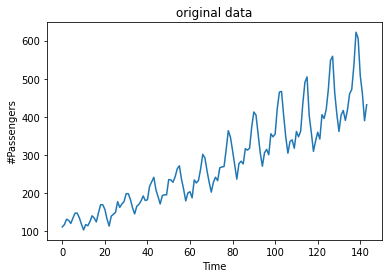

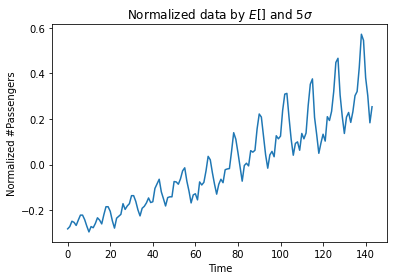

(131, 12, 1) (131,)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
27/27 [==============================] - 0s 37us/step
Loss: 0.0013157674111425877


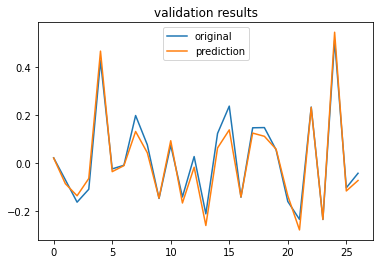

27/27 [==============================] - 0s 147us/step
Loss: 0.0013157674111425877
(27,) (27,)


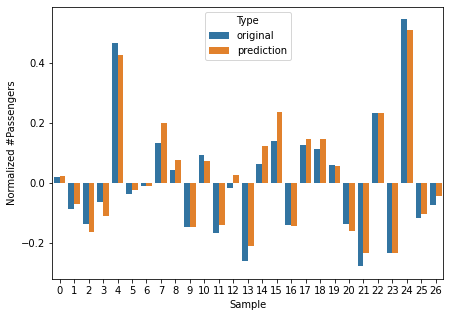

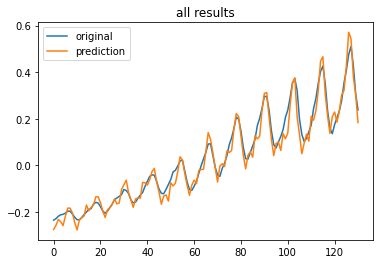

In [17]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models,layers
import seaborn as sns

# 코드 실행 및 결과 보기
def main():
    machine = Machine()
    machine.run(epochs = 400)
    
# 학습하고 평가하기

class Machine:
    def __init__(self):
        self.data = Dataset()
        shape = self.data.X.shape[1:]
        self.model = rnn_model(shape)
        
    def run(self, epochs = 400):
        d = self.data
        X_train, X_test = d.X_train, d.X_test
        y_train, y_test = d.y_train, d.y_test
        X,y = d.X,d.y
        m = self.model
        h= m.fit(X_train, y_train, epochs = epochs, validation_data = [X_test, y_test], verbose =0)
        
        yp = m.predict(X_test)
        print('Loss:', m.evaluate(X_test, y_test))
        plt.plot(yp, label='original')
        plt.plot(y_test, label ='prediction')
        plt.legend(loc=0)
        plt.title('validation results')
        plt.show()
        
        yp = m.predict(X_test).reshape(-1)
        print('Loss:', m.evaluate(X_test, y_test))
        print(yp.shape, y_test.shape)
        
        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test))) * 2
        df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis = 0)
        df['Type'] = ['original'] *len(y_test) + ['prediction'] * len(yp)
        
        plt.figure(figsize=(7,5))
        sns.barplot(x="Sample", y = "Normalized #Passengers", hue = "Type", data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()
        
        yp = m.predict(X)
        
        plt.plot(yp, label='original')
        plt.plot(y, label='prediction')
        plt.legend(loc=0)
        plt.title('all results')
        plt.show()
        
        
# LSTM 시계열 회귀 모델링
def rnn_model(shape):
    m_x = layers.Input(shape = shape)  # X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    m.compile('adam','mean_squared_error')
    m.summary()
    
    return m


# 데이터 불러오기
class Dataset:
    def __init__(self, fname = 'international-airline-passengers.csv', D=12):
        data_dn = load_data(fname = fname)
        X,y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state = 42)
        self.X, self.y = X,y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        
def load_data(fname = 'interational-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('original data')
    plt.show()
        
    # 데이터 정규화
    data_dn = (data-np.mean(data))/ np.std(data) /5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
        
    return data_dn
    
def get_Xy(data, D=12):
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l. append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1],1)
    y = np.array(y_l)
    print(X.shape, y.shape)

    return X,y
    
if __name__ == '__main__':
    main()